In [3]:
import math
from typing import Callable
from copy import copy

import numpy as np
import matplotlib.pyplot as plt

In [4]:
def objective_function(x1: float, x2: float) -> np.float64:
    return (np.sin(x2+0.5) - x1 - 1)**2 + (np.cos(x1-2) + x2)**2

In [53]:
def plot_3d(f: Callable[[float, float], np.float64]):
    x_iter = np.linspace(-10, 10, 100)
    y_iter = np.linspace(-10, 10, 100)

    x, y = np.meshgrid(x_iter, y_iter)
    z = f(x, y)

    figure = plt.figure(figsize=(30, 25))

    ax = figure.add_subplot(1, 3, 1, projection='3d')
    ax.contour3D(x, y, z, 50)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    ax = figure.add_subplot(1, 3, 2, projection='3d')
    ax.contour3D(x, y, z, 50)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(90, 0)

    ax = figure.add_subplot(1, 3, 3, projection='3d')
    ax.contour3D(x, y, z, 90)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(0, 0)

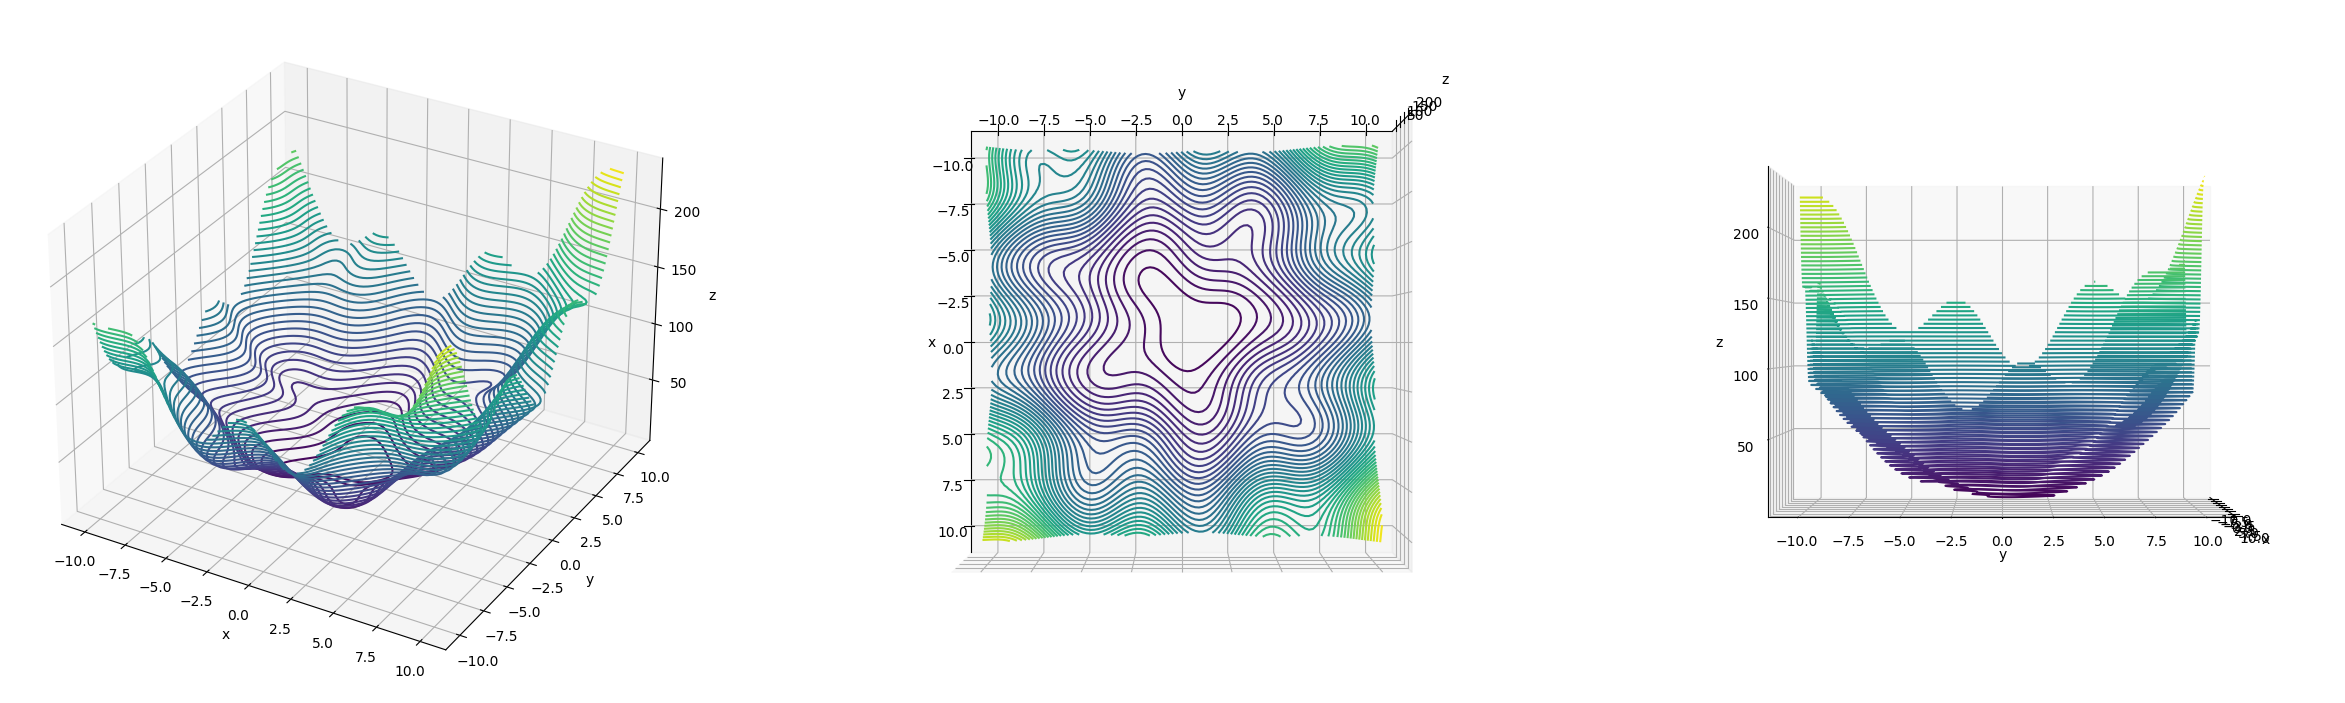

In [54]:
plot_3d(objective_function)

In [42]:
print("OPTIMAL POINT FROM PLOT IS: (0, 0)")
print(f"OBJECTIVE FUNCTION AT (0, 0) == {round(objective_function(0, 0), 2)}")

OPTIMAL POINT FROM PLOT IS: (0, 0)
OBJECTIVE FUNCTION AT (0, 0) == 0.44


# Coordinates descend

In [8]:
X_AXIS = 0
Y_AXIS = 1



def objective_to_single_var(axis, another_axis_value):
    if axis == X_AXIS:
        return lambda x: (np.sin(another_axis_value + 0.5) - x - 1)**2 + (np.cos(x - 2) + another_axis_value)**2

    return lambda y: (np.sin(y + 0.5) - another_axis_value - 1)**2 + (np.cos(another_axis_value - 2) + y)**2

In [9]:
def cal_ratio(_xu, _xl):
    return (math.sqrt(5) - 1) * 0.5 * (_xu - _xl)

def golder_ratio_search(f: Callable, _xu, _xl, axis: str, verbose: bool = False):
    _x = [0, 0]
    _f = [0, 0]
    _result = 0

    _d = cal_ratio(_xu, _xl)
    _x[0] = _xl + _d
    _x[1] = _xu - _d
    _f[0] = f(_x[0])
    _f[1] = f(_x[1])

    if _f[0] < _f[1]:
        _xl = _x[1]
        _result = _x[0]
    else:
        _xu = _x[0]
        _result = _x[1]

    if verbose:
        print(f"Optimal point optimized by axis: {axis} ||| x={round(_result, 3)}, f(x)={round(f(_result), 3)}")

    return _result

In [10]:
def coordinate_descend(start_point, iterations, verbose=False, e: float = None):
    current_best_point = copy(start_point)
    previous_value = None

    for epoch in range(iterations):
        # for each axis
        for axis in [X_AXIS, Y_AXIS]:
            another_axis_value = current_best_point[axis]
            objective_to_optimize = objective_to_single_var(axis, another_axis_value)

            optimized_by_axis = golder_ratio_search(
                objective_to_optimize,
                current_best_point[axis] + 3,
                current_best_point[axis] - 3,
                verbose=True,
                axis="X_AXIS" if axis == X_AXIS else "Y_AXIS",
            )

            current_best_point[axis] = optimized_by_axis  # current_best_point[axis]

        if verbose:
            print(
                f"Iteration: {epoch} - function value: "
                f"f({round(current_best_point[0], 2)}, {round(current_best_point[1], 2)}) = {objective_function(*current_best_point)}"
            )

        if (e is not None
            and previous_value is not None
            and abs(objective_function(*previous_value) - objective_function(*current_best_point)) < e
        ):
            break

        previous_value = copy(current_best_point)

    return current_best_point

In [11]:
optimized_point = coordinate_descend([5, -4], 7, verbose=True, e=0.0001)

Optimal point optimized by axis: X_AXIS ||| x=4.292, f(x)=54.802
Optimal point optimized by axis: Y_AXIS ||| x=-3.292, f(x)=12.498
Iteration: 0 - function value: f(4.29, -3.29) = 47.36538834536059
Optimal point optimized by axis: X_AXIS ||| x=3.584, f(x)=49.451
Optimal point optimized by axis: Y_AXIS ||| x=-2.584, f(x)=6.163
Iteration: 1 - function value: f(3.58, -2.58) = 36.49790860397219
Optimal point optimized by axis: X_AXIS ||| x=2.875, f(x)=39.786
Optimal point optimized by axis: Y_AXIS ||| x=-1.875, f(x)=4.378
Iteration: 2 - function value: f(2.88, -1.88) = 25.108658293291054
Optimal point optimized by axis: X_AXIS ||| x=2.167, f(x)=26.463
Optimal point optimized by axis: Y_AXIS ||| x=-1.167, f(x)=3.713
Iteration: 3 - function value: f(2.17, -1.17) = 14.366305941725905
Optimal point optimized by axis: X_AXIS ||| x=1.459, f(x)=13.155
Optimal point optimized by axis: Y_AXIS ||| x=-0.459, f(x)=2.171
Iteration: 4 - function value: f(1.46, -0.46) = 6.005155599875411
Optimal point opt

In [12]:
print(
    f"The value of objective function in optimized point:"
    f" F({round(optimized_point[0], 2)}, {round(optimized_point[1], 2)}) = {objective_function(*optimized_point)}"
)

The value of objective function in optimized point: F(0.04, 0.96) = 0.33921455971869113


In [13]:
optimized_point = coordinate_descend([4, 3], 6, verbose=True, e=0.0001)

Optimal point optimized by axis: X_AXIS ||| x=3.292, f(x)=46.045
Optimal point optimized by axis: Y_AXIS ||| x=2.292, f(x)=21.397
Iteration: 0 - function value: f(3.29, 2.29) = 22.18577514255376
Optimal point optimized by axis: X_AXIS ||| x=2.584, f(x)=34.573
Optimal point optimized by axis: Y_AXIS ||| x=1.584, f(x)=12.317
Iteration: 1 - function value: f(2.58, 1.58) = 13.203229850183998
Optimal point optimized by axis: X_AXIS ||| x=1.875, f(x)=20.724
Optimal point optimized by axis: Y_AXIS ||| x=0.875, f(x)=5.772
Iteration: 2 - function value: f(1.88, 0.88) = 7.076883465277858
Optimal point optimized by axis: X_AXIS ||| x=1.167, f(x)=8.665
Optimal point optimized by axis: Y_AXIS ||| x=0.167, f(x)=1.938
Iteration: 3 - function value: f(1.17, 0.17) = 3.1031322591188504
Optimal point optimized by axis: X_AXIS ||| x=0.459, f(x)=1.648
Optimal point optimized by axis: Y_AXIS ||| x=0.875, f(x)=0.415
Iteration: 4 - function value: f(0.46, 0.88) = 1.047810780650999
Optimal point optimized by a

In [14]:
print(
    f"The value of objective function in optimized point:"
    f" F({round(optimized_point[0], 2)}, {round(optimized_point[1], 2)}) = {objective_function(*optimized_point)}"
)

The value of objective function in optimized point: F(-0.25, 0.17) = 0.22937838214314782



# Gradient descend

In [23]:
def objective_to_single_variable_value(x_value: float, y_function_via_x: Callable) -> float:
    y_value = y_function_via_x(x_value)
    return (np.sin(y_value+0.5) - x_value - 1)**2 + (np.cos(x_value-2) + y_value)**2


def get_line_through_2_points(point1, point2):
    return lambda x: ((x - point1[0]) / (point2[0] - point1[0])) * (point2[1] - point1[1]) + point1[1]


def get_objective_gradient_value(point: tuple[float, float]):
    dfdx = lambda x,y: 2*x - 2*np.sin(y + 0.5) - 2*(y + np.cos(x - 2)*np.sin(x - 2))
    dfdy = lambda x,y: -2*(x - np.sin(y + 0.5))*np.cos(y + 0.5) + 2*y + 2*np.cos(x - 2)

    return dfdx(*point), dfdy(*point)

In [74]:
def dichotomy_method_step(f: Callable, _xu, _xl):
    delta = np.random.uniform(0, (_xu - _xl)/2)
    middle = (_xl+_xu) / 2

    x1 = middle - delta
    x2 = middle + delta

    if f(x1) > f(x2):
        return x2
    else:
        return x1

In [1]:
from functools import partial


def gradient_descend(start_point, iterations, verbose=False, e: float = None):
    current_best_point = np.array(copy(start_point))
    previous_value = None

    for epoch in range(iterations):
        objective_gradient_value = np.array(get_objective_gradient_value(current_best_point))

        second_point = current_best_point + objective_gradient_value
        line_via_points = get_line_through_2_points(current_best_point, second_point)

        function_to_optimize = partial(objective_to_single_variable_value, y_function_via_x=line_via_points)

        optimized_x = dichotomy_method_step(
            function_to_optimize,
            current_best_point[0] - 1,
            current_best_point[0] + 1,
        )
        current_best_point = optimized_x, line_via_points(optimized_x)

        if verbose:
            print(
                f"Iteration: {epoch} - function value: "
                f"f({round(current_best_point[0], 2)}, {round(current_best_point[1], 2)}) = {objective_function(*current_best_point)}"
            )

        if (e is not None
            and previous_value is not None
            and abs(objective_function(*previous_value) - objective_function(*current_best_point)) < e
        ):
            break

        previous_value = copy(current_best_point)

    return current_best_point

In [92]:
optimized_point = gradient_descend([4, 3], 9, verbose=True, e=0.0001)

Iteration: 0 - function value: f(3.28, 0.24) = 13.308737367470025
Iteration: 1 - function value: f(2.3, 0.9) = 8.791774706956542
Iteration: 2 - function value: f(2.25, 0.33) = 8.011391466449142
Iteration: 3 - function value: f(1.69, 0.17) = 5.54067069776816
Iteration: 4 - function value: f(1.37, 0.09) = 4.082688772791771
Iteration: 5 - function value: f(1.27, 0.07) = 3.6641169633093784
Iteration: 6 - function value: f(0.93, 0.01) = 2.3287510486621894
Iteration: 7 - function value: f(0.8, -0.0) = 1.8939092630882624
Iteration: 8 - function value: f(-0.13, -0.11) = 0.6400092308988383


In [93]:
print(
    f"The value of objective function in optimized point:"
    f" F({round(optimized_point[0], 2)}, {round(optimized_point[1], 2)}) = {objective_function(*optimized_point)}"
)

The value of objective function in optimized point: F(-0.13, -0.11) = 0.6400092308988383


In [109]:
optimized_point = gradient_descend([5, -4], 50, verbose=True, e=0.001)

Iteration: 0 - function value: f(4.42, -3.96) = 48.27245356786329
Iteration: 1 - function value: f(3.99, -3.92) = 40.93805917266434
Iteration: 2 - function value: f(3.37, -3.86) = 30.703425542933864
Iteration: 3 - function value: f(3.36, -3.86) = 30.547113756871653
Iteration: 4 - function value: f(2.66, -3.8) = 21.327561468926845
Iteration: 5 - function value: f(2.29, -3.77) = 17.909172782479576
Iteration: 6 - function value: f(1.46, -3.67) = 13.812002474952891
Iteration: 7 - function value: f(1.06, -3.57) = 13.424229410416608
Iteration: 8 - function value: f(0.12, -3.23) = 14.809227061509596
Iteration: 9 - function value: f(-0.55, -2.64) = 13.73054893502649
Iteration: 10 - function value: f(-0.71, -2.42) = 12.58454069732875
Iteration: 11 - function value: f(-1.12, -1.84) = 8.81286999015989
Iteration: 12 - function value: f(-1.38, -1.4) = 5.78788749403283
Iteration: 13 - function value: f(-1.82, -0.55) = 2.3557089268167406
Iteration: 14 - function value: f(-2.62, -0.07) = 4.17482594921

In [ ]:
print(
    f"The value of objective function in optimized point:"
    f" F({round(optimized_point[0], 2)}, {round(optimized_point[1], 2)}) = {objective_function(*optimized_point)}"
)
